<a href="https://colab.research.google.com/github/LeoSousaJesus/Projetos-faculdade/blob/main/Aula_03_AnaliseDados_Regressao_PredicaoPrecoVeiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predição de preço de veículos



#1. Importar as Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#new_df = df[['largura_veiculo', 'comprimento_veiculo', 'distancia_entre_ eixos', 'peso_veiculo', 'tamanho_motor', 'potencia',
#             'diametro_cilindro', 'rpm_cidade', 'rpm_estrada','fabricante', 'tipo_combustivel', 'aspiracao', 'numero_portas',
#             'carroceria', 'tracao', 'tipo_motor', 'numero_cilindros', 'seguranca', 'preco']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dados_veiculos.csv')

In [ ]:
df.head(2)

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,fabricante,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,tipo_motor,numero_cilindros,seguranca,preco
0,64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,13495.0
1,64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,16500.0


# 2. Criar variáveis indicadoras (dummy) para os atributos categóricos

Na análise de regressão, uma variável fictícia (também conhecida como variável indicadora ou apenas fictícia) é aquela que assume os valores 0 ou 1 para indicar a ausência ou presença de algum efeito categórico que pode mudar o resultado. No aprendizado de máquina, isso é conhecido como **one-hot encoding**.

In [ ]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['fabricante', 'tipo_combustivel', 'aspiracao', 'numero_portas',
       'carroceria', 'tracao', 'tipo_motor', 'numero_cilindros'],
      dtype='object')

In [ ]:
new_df = pd.get_dummies(columns=obj_columns,data=df)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   largura_veiculo          205 non-null    float64
 1   comprimento_veiculo      205 non-null    float64
 2   distancia_entre_ eixos   205 non-null    float64
 3   peso_veiculo             205 non-null    int64  
 4   tamanho_motor            205 non-null    int64  
 5   potencia                 205 non-null    int64  
 6   diametro_cilindro        205 non-null    float64
 7   rpm_cidade               205 non-null    int64  
 8   rpm_estrada              205 non-null    int64  
 9   seguranca                205 non-null    int64  
 10  preco                    205 non-null    float64
 11  fabricante_Nissan        205 non-null    uint8  
 12  fabricante_alfa-romero   205 non-null    uint8  
 13  fabricante_audi          205 non-null    uint8  
 14  fabricante_bmw           2

In [ ]:
new_df[['tracao_4wd','tracao_fwd', 'tracao_rwd' ]].head()

,tracao_4wd,tracao_fwd,tracao_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [ ]:
new_df.columns

Index(['largura_veiculo', 'comprimento_veiculo', 'distancia_entre_ eixos',
       'peso_veiculo', 'tamanho_motor', 'potencia', 'diametro_cilindro',
       'rpm_cidade', 'rpm_estrada', 'seguranca', 'preco', 'fabricante_Nissan',
       'fabricante_alfa-romero', 'fabricante_audi', 'fabricante_bmw',
       'fabricante_buick', 'fabricante_chevrolet', 'fabricante_dodge',
       'fabricante_honda', 'fabricante_isuzu', 'fabricante_jaguar',
       'fabricante_mazda', 'fabricante_mercury', 'fabricante_mitsubishi',
       'fabricante_nissan', 'fabricante_peugeot', 'fabricante_plymouth',
       'fabricante_porsche', 'fabricante_renault', 'fabricante_saab',
       'fabricante_subaru', 'fabricante_toyota', 'fabricante_volkswagen',
       'fabricante_volvo', 'tipo_combustivel_diesel', 'tipo_combustivel_gas',
       'aspiracao_std', 'aspiracao_turbo', 'numero_portas_four',
       'numero_portas_two', 'carroceria_convertible', 'carroceria_hardtop',
       'carroceria_hatchback', 'carroceria_sedan', 'ca

#3. Normalizar atributos numéricos

Como o intervalo de valores dos dados brutos varia muito, em alguns algoritmos de aprendizado de máquina, os modelos não funcionarão corretamente sem normalização. Por exemplo, muitos classificadores calculam a distância entre dois pontos pela distância euclidiana. Se um dos recursos tiver uma ampla faixa de valores, a distância será regida por esse recurso específico. **Portanto, o alcance de todos os recursos deve ser normalizado para que cada recurso contribua aproximadamente proporcionalmente à distância final**.

In [ ]:
new_df.describe()

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,65.907805,174.049268,98.756585,2555.565854,126.907317,104.117073,3.329756,25.219512,30.751220,0.834146,...,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,2.145204,12.337289,6.021776,520.680204,41.642693,39.544167,0.270844,6.542142,6.886443,1.245307,...,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,60.300000,141.100000,86.600000,1488.000000,61.000000,48.000000,2.540000,13.000000,16.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.100000,166.300000,94.500000,2145.000000,97.000000,70.000000,3.150000,19.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,65.500000,173.200000,97.000000,2414.000000,120.000000,95.000000,3.310000,24.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,66.900000,183.100000,102.400000,2935.000000,141.000000,116.000000,3.580000,30.000000,34.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,72.300000,208.100000,120.900000,4066.000000,326.000000,288.000000,3.940000,49.000000,54.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()

In [ ]:
num_cols = new_df.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['largura_veiculo', 'comprimento_veiculo', 'distancia_entre_ eixos',
       'peso_veiculo', 'tamanho_motor', 'potencia', 'diametro_cilindro',
       'rpm_cidade', 'rpm_estrada', 'seguranca', 'preco'],
      dtype='object')

In [ ]:
num_cols = num_cols.drop('preco')
num_cols

Index(['largura_veiculo', 'comprimento_veiculo', 'distancia_entre_ eixos',
       'peso_veiculo', 'tamanho_motor', 'potencia', 'diametro_cilindro',
       'rpm_cidade', 'rpm_estrada', 'seguranca'],
      dtype='object')

In [ ]:
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [ ]:
new_df.describe()

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.089643e-15,3.656696e-15,-1.291108e-15,1.126470e-16,3.466062e-17,1.819683e-16,2.252940e-15,1.104807e-16,1.473076e-16,4.332578e-17,...,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,-2.620512e+00,-2.677244e+00,-2.023713e+00,-2.055348e+00,-1.586561e+00,-1.422573e+00,-2.923049e+00,-1.872388e+00,-2.147310e+00,-2.281433e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.447824e-01,-6.296552e-01,-7.085959e-01,-7.904486e-01,-7.199469e-01,-8.648707e-01,-6.653141e-01,-9.530117e-01,-8.371954e-01,-6.714717e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.905661e-01,-6.900603e-02,-2.924196e-01,-2.725519e-01,-1.662771e-01,-2.311186e-01,-7.312136e-02,-1.868650e-01,-1.093538e-01,1.335090e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.636501e-01,7.354037e-01,6.065210e-01,7.305117e-01,3.392475e-01,3.012332e-01,9.262039e-01,7.325109e-01,4.729195e-01,9.384897e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.987056e+00,2.766741e+00,3.686225e+00,2.907988e+00,4.792679e+00,4.661448e+00,2.258638e+00,3.643868e+00,3.384286e+00,1.743470e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

# 4. Segmentar o conjunto de teste e treinamento

Em particular, três conjuntos de dados são comumente usados em diferentes estágios da criação do modelo: conjuntos de treinamento, validação e teste.

* Dados de treinamento: usado para treinar o modelo.
* Dados de validação: usado para comparação de diferentes modelos e hiperparâmetros.
* Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

***No escopo desta atividade***, como não ajustaremos hiperparâmetros, utilizaremos apenas o conjunto de treinamento e teste



In [ ]:
x = new_df.drop(columns=["preco"])
y = new_df["preco"]

In [ ]:
x

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
0,-0.844782,-0.426521,-1.690772,-0.014566,0.074449,0.174483,0.519071,-0.646553,-0.546059,1.743470,...,0,0,0,0,0,1,0,0,0,0
1,-0.844782,-0.426521,-1.690772,-0.014566,0.074449,0.174483,0.519071,-0.646553,-0.546059,1.743470,...,0,0,0,0,0,1,0,0,0,0
2,-0.190566,-0.231513,-0.708596,0.514882,0.604046,1.264536,-2.404880,-0.953012,-0.691627,0.133509,...,0,1,0,0,0,0,1,0,0,0
3,0.136542,0.207256,0.173698,-0.420797,-0.431076,-0.053668,-0.517266,-0.186865,-0.109354,0.938490,...,0,0,0,0,0,1,0,0,0,0
4,0.230001,0.207256,0.107110,0.516807,0.218885,0.275883,-0.517266,-1.106241,-1.273900,0.938490,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.398245,1.198549,1.721873,0.763241,0.339248,0.250533,1.666445,-0.340094,-0.400490,-1.476452,...,0,0,0,0,0,1,0,0,0,0
201,1.351515,1.198549,1.721873,0.949992,0.339248,1.416637,1.666445,-0.953012,-0.837195,-1.476452,...,0,0,0,0,0,1,0,0,0,0
202,1.398245,1.198549,1.721873,0.878757,1.109571,0.757535,0.926204,-1.106241,-1.128332,-1.476452,...,0,1,0,0,0,0,1,0,0,0
203,1.398245,1.198549,1.721873,1.273437,0.435538,0.047732,-1.183483,0.119594,-0.546059,-1.476452,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: preco, Length: 205, dtype: float64

In [ ]:
x.shape

(205, 61)

In [ ]:
y.shape

(205,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=42)

In [ ]:
x_train

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
66,0.089812,0.077250,1.022697,0.278074,0.170739,-0.814171,0.371023,0.885740,1.200761,-0.671472,...,0,0,0,0,0,1,0,0,0,0
111,1.164596,1.027916,1.522109,1.000049,-0.166277,-0.231119,0.482059,-0.953012,-0.982764,-0.671472,...,0,0,0,0,0,1,0,0,0,0
153,-1.078431,-0.353393,-0.508831,-0.530538,-0.840310,-1.067671,-1.035435,0.885740,0.909625,-0.671472,...,0,0,0,0,0,1,0,0,0,0
96,-0.984972,-0.710909,-0.708596,-1.125445,-0.719947,-0.890221,-0.665314,0.885740,0.909625,0.133509,...,0,0,0,0,0,1,0,0,0,0
38,-0.330755,-0.532151,-0.375655,-0.513210,-0.407003,-0.459269,-0.665314,0.272823,0.327351,-0.671472,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.930947,0.361638,0.073815,1.123266,1.302152,1.416637,0.371023,-0.953012,-0.837195,0.133509,...,0,1,0,0,0,0,1,0,0,0
14,0.463650,1.214799,0.789639,0.961544,0.892917,0.427984,-0.073121,-0.799782,-0.837195,0.133509,...,0,0,0,0,0,0,1,0,0,0
92,-0.984972,-0.710909,-0.708596,-1.188979,-0.719947,-0.890221,-0.665314,0.885740,0.909625,0.133509,...,0,0,0,0,0,1,0,0,0,0
179,0.837488,0.767905,0.689756,0.886458,1.061426,1.441987,-0.221170,-0.953012,-0.982764,1.743470,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print("x_teinamento - >  ",x_train.shape)
print("x_teste - >  ",x_test.shape)
print("y_treinamento - >  ",y_train.shape)
print("y_teste - >  ",y_test.shape)

x_teinamento - >   (164, 61)
x_teste - >   (41, 61)
y_treinamento - >   (164,)
y_teste - >   (41,)


#5. Construção do Modelo

O modelo é avaliado com base no desempenho de cada um dos algoritmos de regressão. Este desempenho é baseado no coeficiente de determinação - também chamado de R2 Score, que é usado para avaliar o desempenho de um modelo de regressão. **Quanto maior o valor de R2, melhor é o resultado.**


In [ ]:
score_modelos = {}

In [ ]:
def predicao_modelo(model):
    #Treinamento do modelo
    model.fit(x_train,y_train)

    #Validacao do modelo
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)

    #Calculo do erro
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100

    #Impressao do resultado
    index = str(model).index('(')
    if index > 0:
      nome_modelo = str(model)[0:index]
    else:
      nome_modelo = str(model)

    score_modelos[nome_modelo] = {"treinamento": a, "teste" : b}

    print(f"r2_Score do modelo {nome_modelo} no \033[1m Conjunto de Treinamento: {a:.2f}\033[0m")
    print(f"r2_Score do modelo {nome_modelo} no \033[1m Conjunto de Teste: {b:.2f}\033[0m")

##5.1. Modelo de **Regressão Linear**

In [ ]:
predicao_modelo(LinearRegression())

r2_Score do modelo LinearRegression no  Conjunto de Treinamento: 97.08
r2_Score do modelo LinearRegression no  Conjunto de Teste: 89.85


##5.2 Modelo de **Árvore de Decisão**

In [ ]:
predicao_modelo(DecisionTreeRegressor())

r2_Score do modelo DecisionTreeRegressor no  Conjunto de Treinamento: 99.87
r2_Score do modelo DecisionTreeRegressor no  Conjunto de Teste: 91.27


##5.3. Modelo **Random Forest**

In [ ]:
predicao_modelo(RandomForestRegressor())

r2_Score do modelo RandomForestRegressor no  Conjunto de Treinamento: 98.39
r2_Score do modelo RandomForestRegressor no  Conjunto de Teste: 95.80


##5.4. Modelo de **Regressão Ada-Boost**

In [ ]:
predicao_modelo(AdaBoostRegressor())

r2_Score do modelo AdaBoostRegressor no  Conjunto de Treinamento: 95.50
r2_Score do modelo AdaBoostRegressor no  Conjunto de Teste: 90.33


##5.5. Modelo de **Regressão Gradient-Boosting**

In [ ]:
predicao_modelo(GradientBoostingRegressor())

r2_Score do modelo GradientBoostingRegressor no  Conjunto de Treinamento: 99.25
r2_Score do modelo GradientBoostingRegressor no  Conjunto de Teste: 92.49


##5.6. Modelo de **Regressão XGBRegressor**

In [ ]:
predicao_modelo(XGBRegressor())

r2_Score do modelo XGBRegressor no  Conjunto de Treinamento: 99.87
r2_Score do modelo XGBRegressor no  Conjunto de Teste: 94.47


#6. Comparando a Performance dos Modelos

In [ ]:
df_resultados = pd.DataFrame(score_modelos)
df_resultados

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,XGBRegressor
treinamento,97.080558,99.865371,98.391351,95.500993,99.250175,99.865278
teste,89.852226,91.272406,95.799266,90.332886,92.490463,94.470624


In [ ]:
df_resultados = df_resultados.T
df_resultados

,treinamento,teste
LinearRegression,97.080558,89.852226
DecisionTreeRegressor,99.865371,91.272406
RandomForestRegressor,98.391351,95.799266
AdaBoostRegressor,95.500993,90.332886
GradientBoostingRegressor,99.250175,92.490463
XGBRegressor,99.865278,94.470624


#7. Plotando a Performance dos Modelos

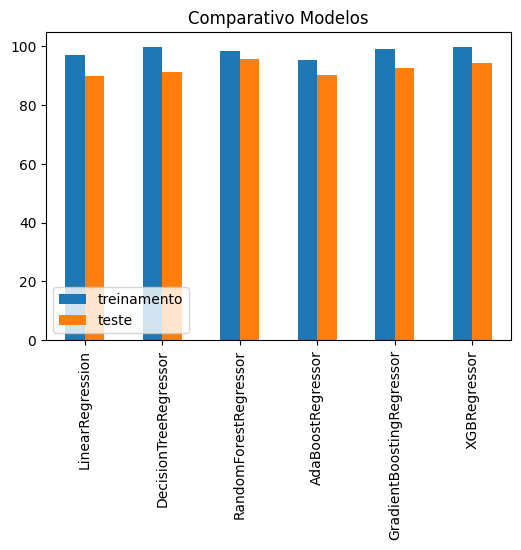

In [ ]:
df_resultados.plot(kind='bar', title='Comparativo Modelos', figsize=(6,4)).legend(loc='lower left')

#8. Avaliando o Resultado

In [ ]:
x_test[8:9]

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
147,-0.237296,-0.04463,-0.29242,-0.193616,-0.455148,-0.256469,1.074252,-0.033636,0.036215,-0.671472,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
y_test[8:9]

147    10198.0
Name: preco, dtype: float64

In [ ]:
modelo = RandomForestRegressor()
modelo.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
modelo.predict(x_test[9:10])

array([7946.52])

In [ ]:
(7946.52 - 7775.0)/7946.52

0.021584290985236357

In [ ]:
y_test[9:10]

182    7775.0
Name: preco, dtype: float64

In [ ]:
x_test[9:10]

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,seguranca,...,tipo_motor_ohcf,tipo_motor_ohcv,tipo_motor_rotor,numero_cilindros_eight,numero_cilindros_five,numero_cilindros_four,numero_cilindros_six,numero_cilindros_three,numero_cilindros_twelve,numero_cilindros_two
182,-0.190566,-0.190886,-0.242478,-0.567118,-0.719947,-1.321172,-1.183483,1.805116,2.219739,0.93849,...,0,0,0,0,0,1,0,0,0,0


#Salvando e Recuperando o Modelo

In [ ]:
modelo2 = GradientBoostingRegressor()
modelo2.fit(x_train,y_train)
modelo2.predict(x_test[8:9])

array([8895.21499952])

In [ ]:
from joblib import dump, load
dump(modelo2, 'arquivo.joblib')

['arquivo.joblib']

In [ ]:
modelo_x = load('arquivo.joblib')

In [ ]:
modelo_x.predict(x_test[8:9])

array([8895.21499952])

In [ ]:
2

#Atividade 1

Utilizando o Conjunto de Dados de consumo de cerveja, disponível em https://www.kaggle.com/code/lfleone/regressao-linear-consumo-cerveja/input, faça um modelo de regressão, utilizando o método que estudamos nas últimas aulas - prepação do dado e modelagem, para prever o consumo de cerveja.

Avalie o melhor modelo a ser utilizado para resolver esse problema.